<h1><center>Actividad 4</center></h1>
<h2><center>Decision Tree</center></h2>
<h3><center>Juan Manuel Aviña Muñoz</center></h3>

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
eps = np.finfo(float).eps
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from numpy import log2 as log
from pprint import pprint
import seaborn as sns


# Load Data Set

In [2]:
# Load data from a CSV file into a Pandas DataFrame
df = pd.read_csv("../DB/diabetes.csv")

print(f"Total instances: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")
df.head()

Total instances: 768
Total features: 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
D = df[(df['Outcome'] != 0)]
H = df[(df['Outcome'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = df['Outcome'].value_counts().values.tolist(), 
                    y = ['Healthy','Diabetic' ], 
                    orientation = 'h', 
                    text=df['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data=[trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels=['Healthy','Diabetic'], values = df['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [6]:
target_count()
target_percent()

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

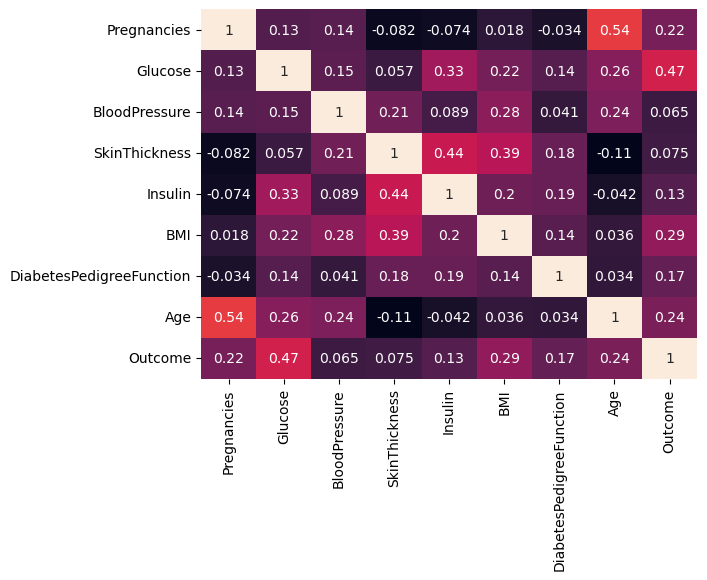

In [9]:
sns.heatmap(df.corr(),cmap='rocket', cbar=False, annot=True)

In [10]:
df_d0 = df[df['Outcome'] == 0]
df_d1 = df[df['Outcome'] == 1]

df_d0_samp = df_d0.sample(268,replace = False)
df_bal = pd.concat([df_d1, df_d0_samp])

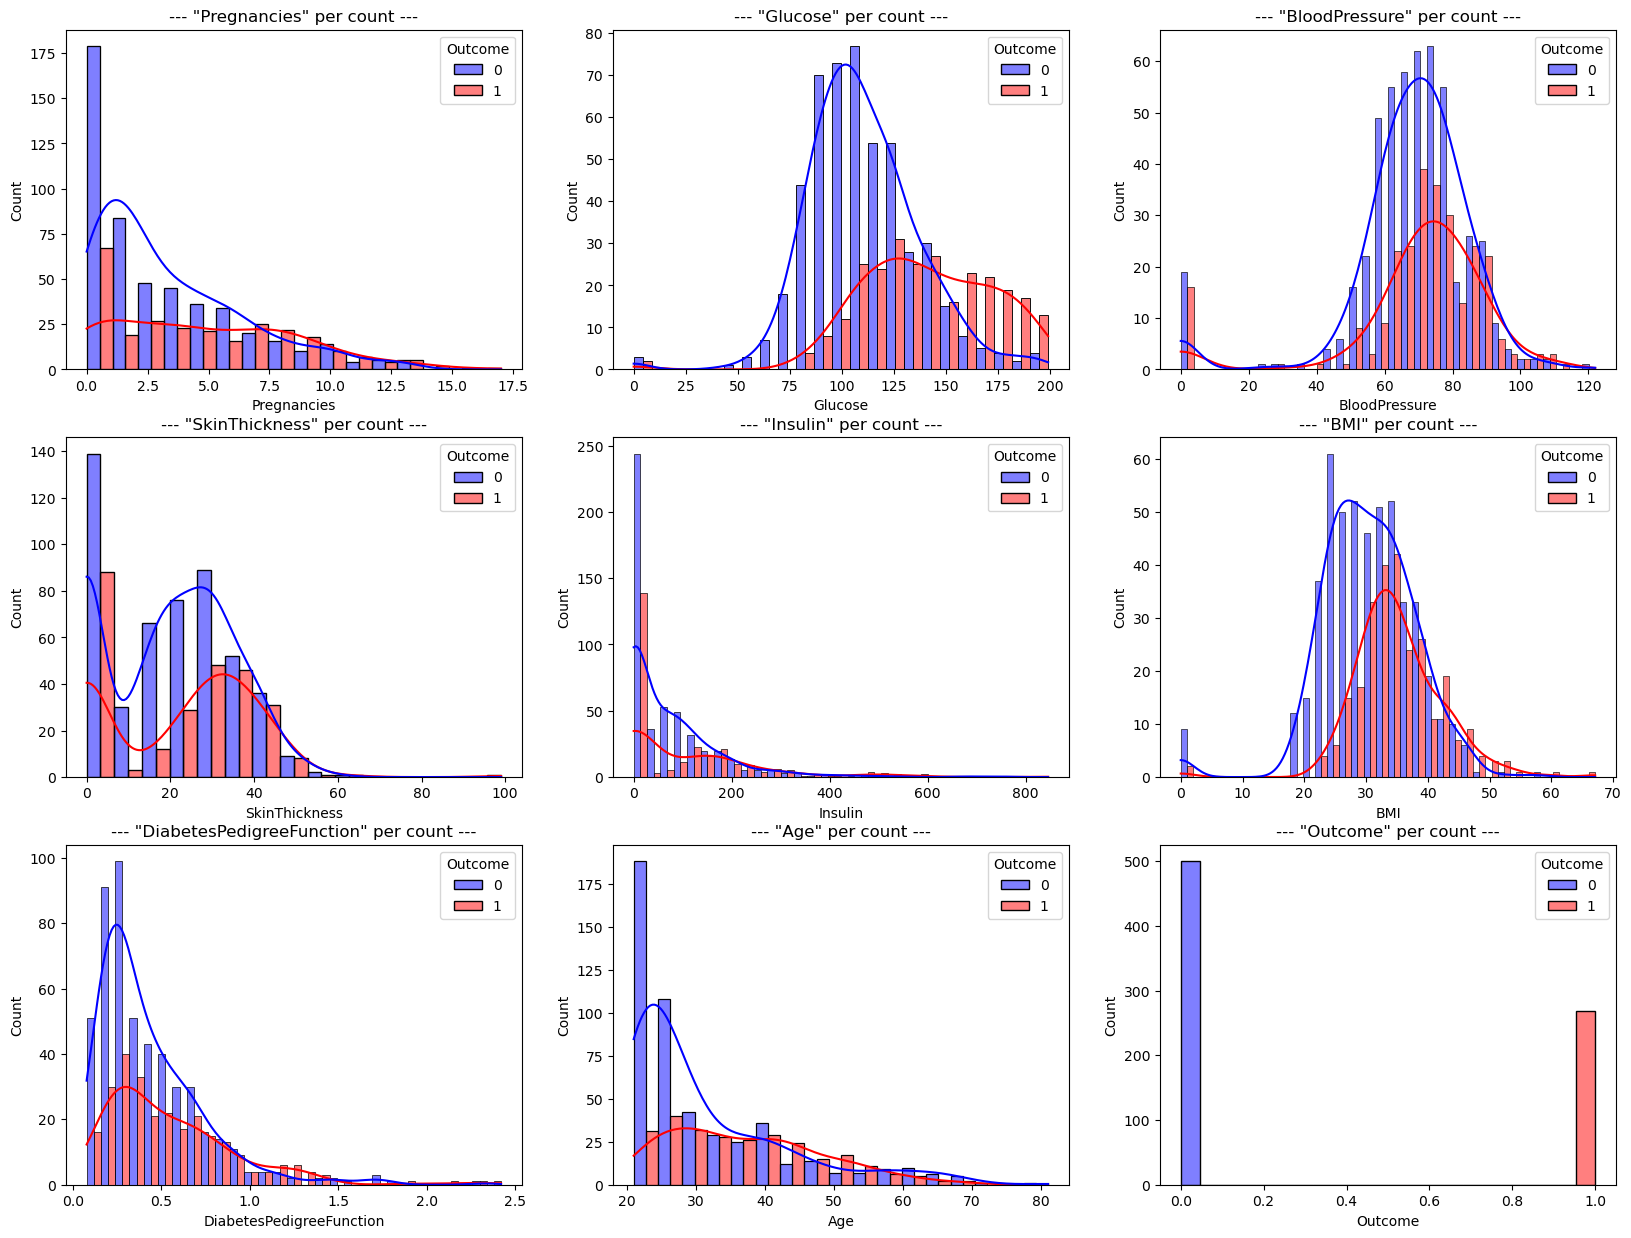

In [11]:
def look_at_distr_hist(df_num=None, class_feature="Outcome"):
    if df_num is not None:
        plt.figure(figsize = [20, 15])
        counter = 0
        for i in df_num.columns:
            counter += 1
            plt.subplot(3, 3, counter)
            sns.histplot(data = df, x = df[str(i)], hue = df[class_feature], multiple  = 'dodge', palette={0: 'blue', 1: 'red'}, kde=True)
            plt.title(f'--- "{i}" per count ---')
        plt.plot()
look_at_distr_hist(df_num=df_bal, class_feature="Outcome")

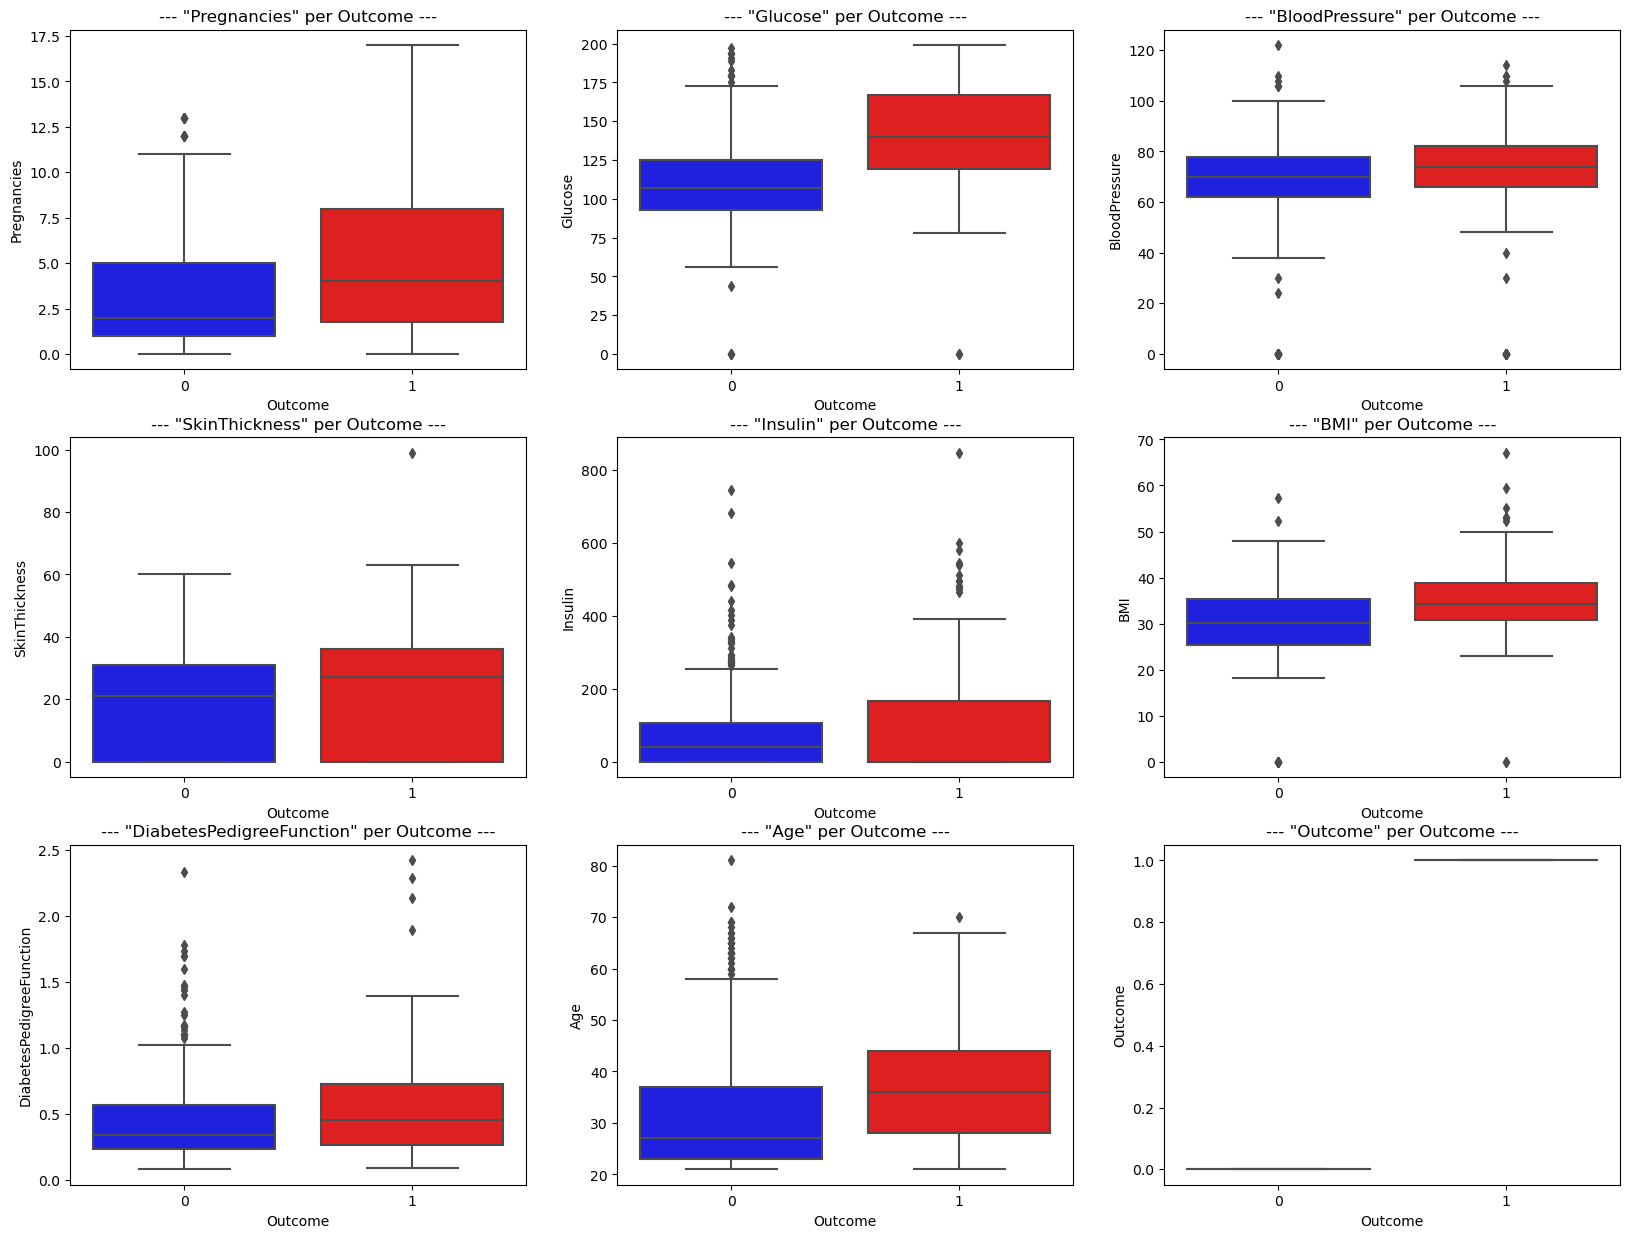

In [12]:
def look_at_distr_box(df_num=None, class_feature="Outcome"):
    if df_num is not None:
        plt.figure(figsize = [20, 15])
        counter = 0
        for i in df_num.columns:
            counter += 1
            plt.subplot(3, 3, counter)
            sns.boxplot(data = df, y = df[str(i)], x = df[class_feature], dodge=True, palette={0: 'blue', 1: 'red'})
            plt.title(f'--- "{i}" per {class_feature} ---')
        plt.plot()

look_at_distr_box(df_num=df_bal, class_feature="Outcome")

In [13]:
# Drop unnecesary features

df.drop(columns=['BloodPressure', 'SkinThickness'], inplace=True)

In [14]:
def change_cate(df, col_name, ran, categories):
    df[col_name] = pd.qcut(df[col_name], ran, labels=categories)
    
# Specify the transformations for each column
transformations = [
    ('Pregnancies', 4, ['0', '1', '2', '3']),
    ('Insulin', 2, ['low', 'high']),
    ('BMI', 2, ['0', '1']),
    ('DiabetesPedigreeFunction', 4, ['0', '1', '2', '3']),
    ('Age', 3, [1, 2, 3])
]

# Apply the transformations to the DataFrame
for col_name, ran, categories in transformations:
    change_cate(df, col_name, ran, categories)

In [15]:
def ent(df,attribute):
    target_variables = df.Outcome.unique() 
    variables = df[attribute].unique()    


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.Outcome==target_variable]) #numerator
            den = len(df[attribute][df[attribute]==variable])  #denominator
            fraction = num/(den+eps)  #pi
            entropy_each_feature += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature

    return(abs(entropy_attribute))

In [16]:
a_entropy = {k:ent(df,k) for k in df.keys()[:-1]}

a_entropy

{'Pregnancies': 0.8906174365362114,
 'Glucose': 0.6289331894874066,
 'Insulin': 0.9323589424690207,
 'BMI': 0.8875090613833397,
 'DiabetesPedigreeFunction': 0.9111364000967174,
 'Age': 0.8682334538933789}

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    category
 1   Glucose                   768 non-null    int64   
 2   Insulin                   768 non-null    category
 3   BMI                       768 non-null    category
 4   DiabetesPedigreeFunction  768 non-null    category
 5   Age                       768 non-null    category
 6   Outcome                   768 non-null    int64   
dtypes: category(5), int64(2)
memory usage: 16.6 KB


<h1><center>Decision Tree</center></h1>

# Manual ID3 Algorithm

In [18]:
class Make_tree(object):
    def __init__(self):
        pass

    # Method to build a decision tree using the ID3 algorithm
    def buildTree(self, df, tree=None):
        # Get the name of the target variable (class)
        Class = df.keys()[-1]

        # Find the best attribute to split the data on
        node = self.find_winner(df)

        # Get unique values of the selected attribute
        attValue = np.unique(df[node])

        # Create an empty dictionary to represent the decision tree
        if tree is None:
            tree = {}
            tree[node] = {}

        # Recursively construct the decision tree
        for value in attValue:
            subtable = self.get_subtable(df, node, value)
            clValue, counts = np.unique(subtable[df.columns[-1]], return_counts=True)

            if len(counts) == 1:
                # If the subset is pure (all samples belong to one class), assign that class
                tree[node][value] = clValue[0]
            else:
                # Continue building the tree recursively
                tree[node][value] = self.buildTree(subtable)

        return tree

    # Calculate the entropy of the target variable in the dataset
    def find_entropy(self, df):
        Class = df.keys()[-1]
        entropy = 0
        values = df[Class].unique()
        for value in values:
            fraction = df[Class].value_counts()[value] / len(df[Class])
            entropy += -fraction * np.log2(fraction)
        return entropy

    # Calculate the entropy of a specific attribute in the dataset
    def find_entropy_attribute(self, df, attribute):
        Class = df.keys()[-1]
        target_variables = df[Class].unique()
        variables = df[attribute].unique()
        entropy2 = 0
        for variable in variables:
            entropy = 0
            for target_variable in target_variables:
                num = len(df[attribute][df[attribute] == variable][df[Class] == target_variable])
                den = len(df[attribute][df[attribute] == variable])
                fraction = num / (den + eps)  # Note: 'eps' is a small positive value
                entropy += -fraction * log(fraction + eps)
            fraction2 = den / len(df)
            entropy2 += -fraction2 * entropy

        return abs(entropy2)

    # Find the attribute with the highest information gain
    def find_winner(self, df):
        Entropy_att = []
        IG = []
        for key in df.keys()[:-1]:
            IG.append(self.find_entropy(df) - self.find_entropy_attribute(df, key))
        return df.keys()[:-1][np.argmax(IG)]

    # Get a subtable of the dataset where the attribute equals a specific value
    def get_subtable(self, df, node, value):
        return df[df[node] == value].reset_index(drop=True)

In [19]:
class DecisionTreeID3:
    def __init__(self):
        self.tree = None

    def fit(self, df):
        # Create an instance of the Make_tree class
        maketree = Make_tree()
        # Build the decision tree using the Make_tree instance
        self.tree = maketree.buildTree(df)

    def predict(self, df):
        # Initialize an empty list for storing predictions
        predictions = []
        for _, sample in df.iterrows():
            # Start the tree traversal from the root
            predicted_class = self.pred(self.tree, sample)
            predictions.append(predicted_class)
        return np.array(predictions)

    def pred(self, tree, sample):
        if not isinstance(tree, dict):
            return tree  # Reached a leaf node, return the predicted class
        # Get the attribute to split on from the current tree node
        root_node = next(iter(tree))
        feature_value = sample[root_node]
        if feature_value in tree[root_node]:
            # Continue traversing the tree with the chosen branch
            return self.pred(tree[root_node][feature_value], sample)
        else:
            # If the value is not in the tree, take the first branch (for simplicity)
            feature_value = list(tree[root_node].keys())[0]
            return self.pred(tree[root_node][feature_value], sample)

In [20]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size = 0.2, random_state=42)

In [21]:
# Create an instance of DecisionTreeID3
t = DecisionTreeID3()

# Fit the decision tree with the training data
t.fit(train_df)

# Print the resulting decision tree
pprint(t.tree)

{'Glucose': {0: {'Pregnancies': {'0': 0, '2': 1}},
             44: 0,
             56: 0,
             57: 0,
             61: 0,
             65: 0,
             67: 0,
             68: 0,
             71: 0,
             72: 0,
             73: 0,
             74: 0,
             75: 0,
             76: 0,
             77: 0,
             78: {'Age': {1: 0, 2: 1, 3: 0}},
             79: 0,
             80: 0,
             81: 0,
             82: 0,
             83: 0,
             84: {'Pregnancies': {'0': 0, '1': 0, '2': 0, '3': 1}},
             85: 0,
             86: 0,
             87: 0,
             88: {'Pregnancies': {'0': {'BMI': {'0': 0, '1': 1}},
                                  '1': 0,
                                  '2': 0,
                                  '3': 0}},
             89: 0,
             90: {'Pregnancies': {'0': 0,
                                  '1': {'Age': {1: 0, 2: 1}},
                                  '2': 0,
                                  '

In [22]:
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

y_pred = t.predict(X_test)

In [23]:
def accuracy_score(y_test, y_pred):
    return np.sum(np.equal(y_test, y_pred)) / len(y_test)

# Calculate the accuracy and print it
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 61.04%


<AxesSubplot: >

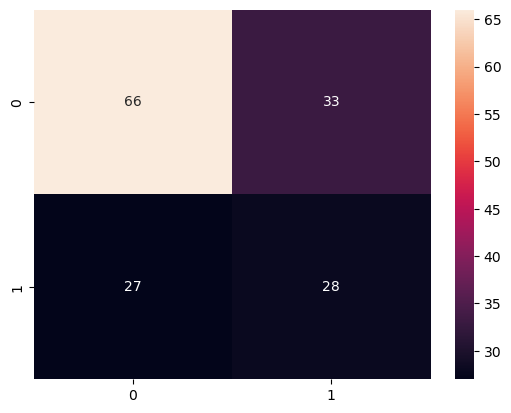

In [24]:
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")

# Sckit Learn ID3 Algorithm

In [25]:
# Libraries
from sklearn.tree import DecisionTreeClassifier

# Load data from a CSV file into a Pandas DataFrame
data = pd.read_csv("../DB/diabetes.csv")

data = pd.DataFrame(data)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create and train the ID3 decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [29]:
# Define the custom accuracy_score function
def accuracy_score(y_true, y_pred):
    return np.sum(np.equal(y_true, y_pred)) / len(y_true)

# Calculate the accuracy and print it
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.38%


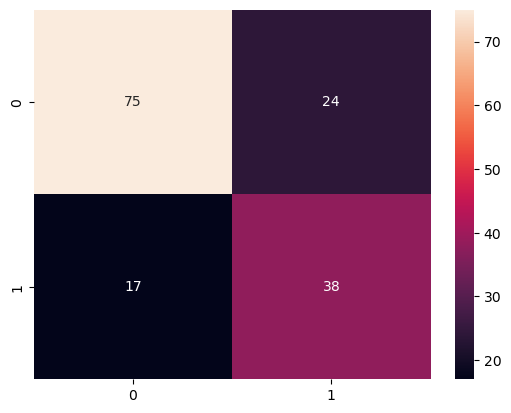

In [30]:
# Calculate and visualize the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.show()

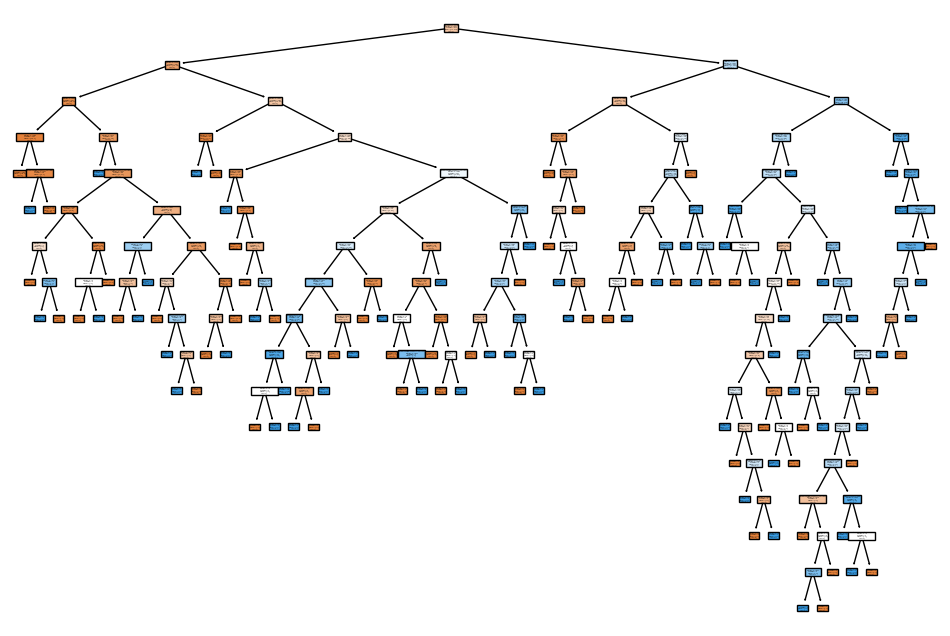

In [31]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=str(clf.classes_))
plt.show()